# HSV Feature Traffic Light Detection and Extraction

In [1]:
import os.path
import os
import cv2 as cv
import numpy as np

file = r"dataset\test_img2.jpg"
image_org = cv.imread(file)
a, b, d, c = 0, 0, 640, 300
image = image_org[a:a+c, b:b+d]
    
blurred = cv.GaussianBlur(image, (5,5),0)
hsv = cv.cvtColor(blurred, cv.COLOR_BGR2HSV)

lower_green, upper_green = np.array([0,117,0]), np.array([179,126,255])
mask_green = cv.inRange(hsv, lower_green, upper_green)

lower_red, upper_red = np.array([0,165,195]), np.array([32,255,255])
mask_red = cv.inRange(hsv, lower_red, upper_red)
    
mask = cv.bitwise_or(mask_green, mask_red)
mask = cv.bitwise_and(image, image, mask=mask)
    
#ret, mask_red = cv.threshold(mask_red, 100, 255, cv.THRESH_OTSU)
#mask_red = ~mask_red
#ret1, mask_green = cv.threshold(mask_green, 100, 255, cv.THRESH_OTSU)
#mask_green = ~mask_green

contours, hierarchy = cv.findContours(mask_red, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
for pic, contour in enumerate(contours):
    area = cv.contourArea(contour)
    if(area > 100):
        x, y, w, h = cv.boundingRect(contour)
        image = cv.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 1)
        #cv.putText(image, "Red", (x, y), cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255))
        cv.imwrite('cropped_hsv/Red/{}.jpg'.format(pic), image[y:y+60, x:x+30])
            
contours1, hierarchy1 = cv.findContours(mask_green, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
for pic1, contour1 in enumerate(contours1):
    area = cv.contourArea(contour1)
    if(area > 100):
        x, y, w, h = cv.boundingRect(contour1)
        image = cv.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 1)
        #cv.putText(image, "TLight", (x, y), cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0))
        cv.imwrite('cropped_hsv/Green/{}.jpg'.format(pic1), image[y:y+60, x:x+30])

# HoG Feature Extraction


(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)

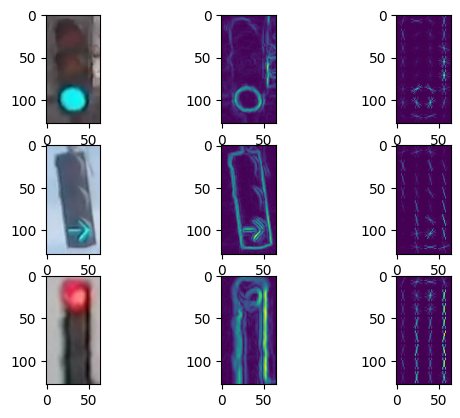

In [2]:
import json
import cv2 as cv
import glob
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import csv
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
import os
i=0

ppc = 16
hog_images = []
hog_features = []
gradient_map = []
org_image_list = []


pathG = "Cropped\Data\Green\*.*"
pathR = "Cropped\Data\Red\*.*"
pathY = "Cropped\Data\Yellow\*.*"

img_number = 1

for file in glob.glob(pathG):
    image_org = cv.imread(file)

    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    image_org_rgb = cv.cvtColor(image_org, cv.COLOR_BGR2RGB)
    org_image_list.append(image_org_rgb)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)
    print(image_org.shape)

    gx = cv.Sobel(image_org, cv.CV_32F, 1, 0, ksize=1)
    gy = cv.Sobel(image_org, cv.CV_32F, 0, 1, ksize=1)
    image_org, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)
    gradient_map.append(image_org)

    fd,hog_image = hog(image_org, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4,4),visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

for file in glob.glob(pathR):
    image_org = cv.imread(file)
    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    image_org_rgb = cv.cvtColor(image_org, cv.COLOR_BGR2RGB)
    org_image_list.append(image_org_rgb)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)
    print(image_org.shape)
    
    gx = cv.Sobel(image_org, cv.CV_32F, 1, 0, ksize=1)
    gy = cv.Sobel(image_org, cv.CV_32F, 0, 1, ksize=1)
    image_org, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)
    gradient_map.append(image_org)
 
    fd,hog_image = hog(image_org, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

for file in glob.glob(pathY):
    image_org = cv.imread(file)
    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    image_org_rgb = cv.cvtColor(image_org, cv.COLOR_BGR2RGB)
    org_image_list.append(image_org_rgb)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)
    print(image_org.shape)

    gx = cv.Sobel(image_org, cv.CV_32F, 1, 0, ksize=1)
    gy = cv.Sobel(image_org, cv.CV_32F, 0, 1, ksize=1)
    image_org, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)
    gradient_map.append(image_org)
 
    fd,hog_image = hog(image_org, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3)
ax1.imshow(org_image_list[1])
ax2.imshow(gradient_map[1])
ax3.imshow(hog_images[1])
ax4.imshow(org_image_list[100])
ax5.imshow(gradient_map[100])
ax6.imshow(hog_images[100])
ax7.imshow(org_image_list[200])
ax8.imshow(gradient_map[200])
ax9.imshow(hog_images[200])

print(hog_features[2].shape)
print(hog_features[2])

# Creat Labels for SVM

In [3]:
labels = []
rootdir = "Cropped\Data"

for dirs in os.listdir(rootdir):
    k = os.path.join(rootdir, dirs)
    for files in os.listdir(k):
        labels.append(dirs)

labels = np.array(labels)
labels =  np.array(labels.reshape(len(labels),1))
print(labels)

[['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']
 ['Green']

# HStack HoG Features to Labels

In [4]:
hog_features = np.array(hog_features)
print(len(hog_features))
data_frame = np.hstack((hog_features,labels))

#Details = ['Color', 'Features']  
hog_features = np.array(hog_features)
with open('hog_feature_list.csv', 'w') as f: 
    write = csv.writer(f) 
    #Details = ['Color', 'Features'] 
    #write.writerow('Green')
    write.writerows(hog_features)

297


# Train SVM

In [5]:
clf = svm.SVC(kernel = 'poly', degree =2)
np.random.shuffle(data_frame)
percentage = 60
partition = int(len(hog_features)*percentage/100)

x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
print(y_pred)

Accuracy: 0.9327731092436975


              precision    recall  f1-score   support

       Green       0.91      1.00      0.96        43
         Red       0.94      0.97      0.96        70
      Yellow       0.00      0.00      0.00         6

    accuracy                           0.93       119
   macro avg       0.62      0.66      0.64       119
weighted avg       0.89      0.93      0.91       119

['Red' 'Red' 'Green' 'Green' 'Red' 'Red' 'Green' 'Green' 'Green' 'Green'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Green' 'Red' 'Red' 'Green' 'Green' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Green' 'Red' 'Red' 'Green' 'Green' 'Red'
 'Green' 'Red' 'Red' 'Red' 'Red' 'Red' 'Green' 'Red' 'Green' 'Red' 'Green'
 'Green' 'Green' 'Red' 'Red' 'Red' 'Green' 'Red' 'Red' 'Green' 'Green'
 'Red' 'Green' 'Red' 'Green' 'Red' 'Green' 'Red' 'Red' 'Green' 'Red' 'Red'
 'Red' 'Green' 'Red' 'Green' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red'
 'Green' 'Green' 'Red' 'Red' 'Red' 'Green' 'Green' 'Red' 'Red' 'Green'
 'Gree

c:\Users\anjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Predecting an Given Input from the Trainned Model SVM

(128, 64)
(1, 640)
Input Image Predection -  ['Green']


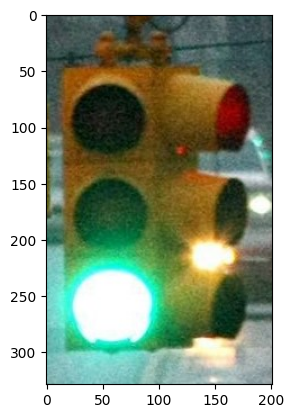

In [6]:
file = 'Cropped/testing/test2.jpg'
image_org = cv.imread(file)
image_org_rgb1 = cv.cvtColor(image_org, cv.COLOR_BGR2RGB)
plt.imshow(image_org_rgb1)
image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

up_width = 64
up_height = 128
up_points = (up_width, up_height)
    
image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
print(image_org.shape)
 
fd,hog_image = hog(image_org, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4,4),visualize=True)
#hog_images.append(hog_image)
#hog_features.append(fd)
hog_img = np.array(fd)
hog_img =  np.array(hog_img.reshape(1, len(hog_img)))
print(hog_img.shape)

y_pred = clf.predict(hog_img)
print('Input Image Predection - ', y_pred)

# Reshaping Cropped Images for the CNN

In [7]:
cnn_crop = []

pathG = "Cropped\Data\Green\*.*"
pathR = "Cropped\Data\Red\*.*"
pathY = "Cropped\Data\Yellow\*.*"

img_number = 1

for file in glob.glob(pathG):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop.append(image_org)

for file in glob.glob(pathR):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop.append(image_org)

for file in glob.glob(pathY):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop.append(image_org)

labels1 = []
rootdir = "Cropped\cnn"

for dirs in os.listdir(rootdir):
    k = os.path.join(rootdir, dirs)
    for files in os.listdir(k):
        labels1.append(int(dirs))

labels1 = np.array(labels1)

array_crop = np.array(cnn_crop)
array_crop = array_crop.reshape(len(array_crop),128,64,1)
print(array_crop.shape)
print(labels1.shape)

x_train1 = array_crop
y_train1 = labels1
print(x_train1.shape)
print(y_train1.shape)

x_train1 = x_train1.astype('float32')

x_train1 /= 255

n_classes = 3
y_train1 = np.asarray(y_train1).astype('float32').reshape((-1,1))

print(y_train1.shape)
#data_frame_cnn = np.hstack((array_crop,labels1))

(297, 128, 64, 1)
(297,)
(297, 128, 64, 1)
(297,)
(297, 1)


In [8]:
cnn_crop1 = []

pathG = "Cropped\Data\Green\*.*"
pathR = "Cropped\Data\Red\*.*"
pathY = "Cropped\Data\Yellow\*.*"

img_number = 1

for file in glob.glob(pathG):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop1.append(image_org)

for file in glob.glob(pathR):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop1.append(image_org)

for file in glob.glob(pathY):
    image_org = cv.imread(file)
    image_org = cv.cvtColor(image_org, cv.COLOR_BGR2GRAY)

    
    up_width = 64
    up_height = 128
    up_points = (up_width, up_height)
    
    image_org = cv.resize(image_org, up_points, interpolation= cv.INTER_LINEAR)
    cnn_crop1.append(image_org)

labels2 = []
rootdir = "Cropped\cnn"

for dirs in os.listdir(rootdir):
    k = os.path.join(rootdir, dirs)
    for files in os.listdir(k):
        labels2.append(int(dirs))

labels2 = np.array(labels2)

array_crop1 = np.array(cnn_crop1)
array_crop1 = array_crop1.reshape(len(array_crop1),128,64,1)
print(array_crop1.shape)
print(labels2.shape)

x_test1 = array_crop1
y_test1 = labels2

x_test1 = x_test1.astype('float32')
x_test1 /= 255
y_test1 = np.asarray(y_test1).astype('float32').reshape((-1,1))

(297, 128, 64, 1)
(297,)


# Train CNN

In [9]:
from tensorflow.keras.models import load_model, save_model

model = models.Sequential()
model.add(layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu', input_shape=(128, 64, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=50, kernel_size=(5,5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='relu'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(x_train.shape)
print(model.summary())

history = model.fit(x_train1, y_train1, epochs=100) #steps_per_epoch=236
test_loss, test_acc =  model.evaluate(x_test1, y_test1, verbose = 2)
print('\nTest Accuracy : ', test_acc)
print('\nTest Accuracy as Percentage : ', test_acc*100)

save_model(model, 'trained_model.h5')




(178, 640)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 60, 20)       520       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 30, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 26, 50)        25050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 13, 50)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18850)             0         
                                                                 
 dense (Dense)               (None, 128)  

C:\Users\anjan\AppData\Local\Temp\ipykernel_112844\2903719124.py:24: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'trained_model.h5')


# CNN Plot Accuracy vs Loss

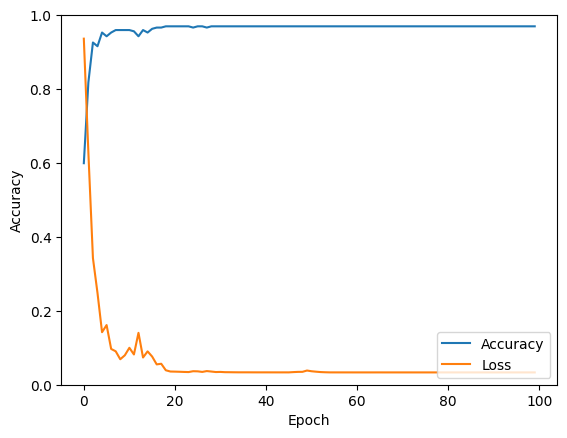

In [10]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Predecting an Given Input from the Trainned Model CNN

1/1 [==============================] - 0s 81ms/step
Predicted traffic light color: Red


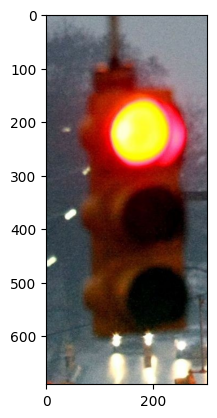

In [11]:
model = load_model('trained_model.h5')  # Loading the trained model

def preprocess_image(image_path):
    
    image = cv.imread(image_path) # Loading and preprocess the image
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resized = cv.resize(gray, (64, 128)) 
    normalized = resized.astype('float32') / 255.0  # Normalize pixel values
    preprocessed_image = np.expand_dims(normalized, axis=-1)  # Add batch dimension
    return preprocessed_image

def predict_traffic_light_color(image_path):
    preprocessed_image = preprocess_image(image_path)
    
    prediction = model.predict(np.array([preprocessed_image]))
    predicted_class = np.argmax(prediction)
    
    if predicted_class == 0:
        return "Green"
    elif predicted_class == 1:
        return "Red"
    elif predicted_class == 2:
        return "Yellow"
    else:
        return "Unknown"

image_path = 'Cropped/testing/test1.jpg' 
predicted_color = predict_traffic_light_color(image_path)
print("Predicted traffic light color:", predicted_color)
image_1 = cv.imread(image_path) 
rgb_img = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
